# Titanic Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Exploratory Data Analysis (EDA)**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.shape

(891, 12)

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
test_df.shape

(418, 11)

In [10]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train_df['Name'].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

In [13]:
train_df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [14]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [15]:
train_df['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [16]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [17]:
test_df['Name'].describe()

count                  418
unique                 418
top       Kelly, Mr. James
freq                     1
Name: Name, dtype: object

In [18]:
test_df['Sex'].describe()

count      418
unique       2
top       male
freq       266
Name: Sex, dtype: object

In [19]:
test_df['Ticket'].describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

In [20]:
test_df['Cabin'].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [21]:
test_df['Embarked'].describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

Las columnas 'Cabin', 'Age', 'Embarked' tienen valores perdidos en el dataset train_df. Y las columnas 'Cabin', 'Age' y 'Fare' tienen valores perdidos en el dataset test_df. Además, las columnas 'Cabin' y 'Ticket' tienen datos duplicados. En ambos casos se podría explicar a que pertenecen a familias.

# **Data Cleaning**

La variable 'Cabin' tiene muchos valores NaN (687 en train_df y 327 en test_df) así que vamos a eliminarla.

In [22]:
train_df=train_df.drop('Cabin', axis=1)

In [23]:
test_df=test_df.drop('Cabin', axis=1)

La variable 'Embarked' tiene solo 2 NaN, así que asignaremos el valor más frecuente.test_df['Title']=test_df.Name.str.extract('([A-Za-z]+)\.')

In [24]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
train_df['Embarked']= train_df['Embarked'].fillna('S')

In [26]:
train_df['Title']=train_df.Name.str.extract('([A-Za-z]+)\.')

In [27]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [28]:
Title_dict ={'Master':'Master', 'Miss':'Miss', 'Mrs':'Mrs', 'Mr':'Mr', 'Mme':'Mrs', \
             'Mlle':'Miss', 'Dr': 'Dr', 'Rev': 'Rev', 'Major': 'Officer', 'Col': 'Officer', \
             'Countess':'Royalty', 'Capt': 'Officer', 'Ms':'Mrs', 'Sir': 'Royalty', 'Lady': 'Royalty', \
             'Don': 'Royalty', 'Jonkheer': 'Royalty', 'Dona':'Royalty'}

In [29]:
train_df['Title']=train_df['Title'].map(Title_dict)

In [30]:
train_df['Title']=train_df['Title'].astype('category')

In [31]:
train_df['Title'].describe()

count     891
unique      8
top        Mr
freq      517
Name: Title, dtype: object

In [32]:
round(train_df.groupby('Title')['Age'].agg(['mean','count']).sort_values('mean'),1)

,mean,count
Title,,
Master,4.6,36
Miss,21.8,148
Mr,32.4,398
Mrs,35.7,110
Royalty,41.6,5
Dr,42.0,6
Rev,43.2,6
Officer,56.6,5


In [33]:
test_df['Title']=test_df.Name.str.extract('([A-Za-z]+)\.')

In [34]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [35]:
test_df['Title']=test_df['Title'].map(Title_dict)

In [36]:
test_df['Title']=test_df['Title'].astype('category')

In [37]:
test_df['Title'].describe()

count     418
unique      8
top        Mr
freq      240
Name: Title, dtype: object

In [38]:
round(test_df.groupby('Title')['Age'].agg(['mean','count']).sort_values('mean'),1)

,mean,count
Title,,
Master,7.4,17
Miss,21.8,64
Mr,32.0,183
Rev,35.5,2
Mrs,38.9,62
Royalty,39.0,1
Officer,50.0,2
Dr,53.0,1


In [39]:
train_df['Title']=np.where(((train_df['Sex']=='female') & (train_df['SibSp']==0) & (train_df['Parch']>0) &(train_df['Title']=='Miss') & (train_df['Age']<=18.0)), 'Miss_Child', train_df['Title'])

In [40]:
train_df['Title'].value_counts()

Mr            517
Miss          167
Mrs           127
Master         40
Miss_Child     17
Dr              7
Rev             6
Royalty         5
Officer         5
Name: Title, dtype: int64

In [41]:
test_df['Title']=np.where(((test_df['Sex']=='female') & (test_df['Parch']>0) & (test_df['Title']=='Miss') &(test_df['Age']<=18.0)), 'Miss_Child', test_df['Title'])

In [42]:
test_df['Title'].value_counts()

Mr            240
Mrs            73
Miss           64
Master         21
Miss_Child     14
Officer         2
Rev             2
Dr              1
Royalty         1
Name: Title, dtype: int64

In [43]:
round(train_df.groupby('Title')['Age'].agg(['mean','count']).sort_values('mean'),1)

,mean,count
Title,,
Master,4.6,36
Miss_Child,10.4,17
Miss,23.3,131
Mr,32.4,398
Mrs,35.7,110
Royalty,41.6,5
Dr,42.0,6
Rev,43.2,6
Officer,56.6,5


In [44]:
round(test_df.groupby('Title')['Age'].agg(['mean','count']).sort_values('mean'),1)

,mean,count
Title,,
Miss_Child,7.0,14
Master,7.4,17
Miss,25.9,50
Mr,32.0,183
Rev,35.5,2
Mrs,38.9,62
Royalty,39.0,1
Officer,50.0,2
Dr,53.0,1


In [45]:
train_df['Age'].fillna(train_df.groupby('Title')['Age'].transform('mean'), inplace=True)

In [46]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [47]:
test_df['Age'].fillna(test_df.groupby('Title')['Age'].transform('mean'), inplace=True)

In [48]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,Mr


In [49]:
test_df[(test_df['Pclass']==3) & (test_df['SibSp']==0) & (test_df['Parch']==0) & (test_df['Title']=='Mr')].agg({'Fare':['mean','count']})

,Fare
mean,8.62669
count,106.00000


In [50]:
test_df['Fare']=test_df['Fare'].fillna(8.6267)

In [51]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

# **Data Visualization**

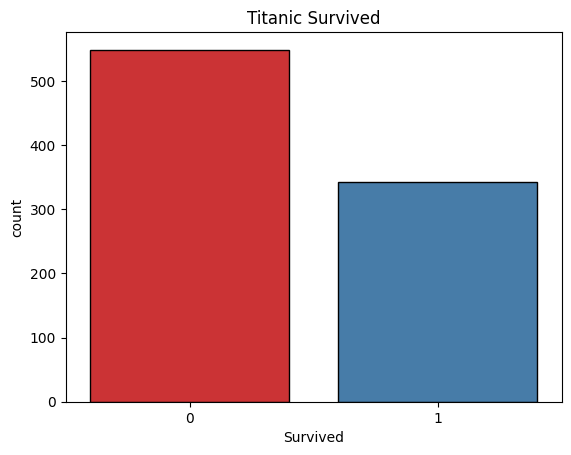

In [52]:
sns.countplot(x='Survived', data=train_df, 
              palette='Set1',
             edgecolor='black')
plt.title('Titanic Survived')
plt.show()

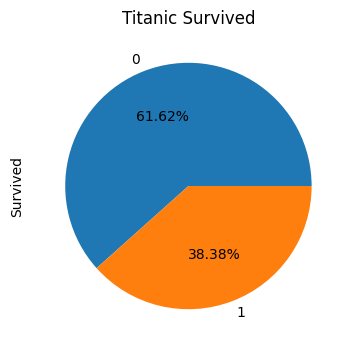

In [53]:
plot=train_df['Survived'].value_counts().plot(kind='pie', title='Titanic Survived', figsize=(4,4), autopct='%1.2f%%')

Según el gráfico de arriba, solo el 38,38% de los pasajeros del Titanic sobrevivió basándonos en este training data.

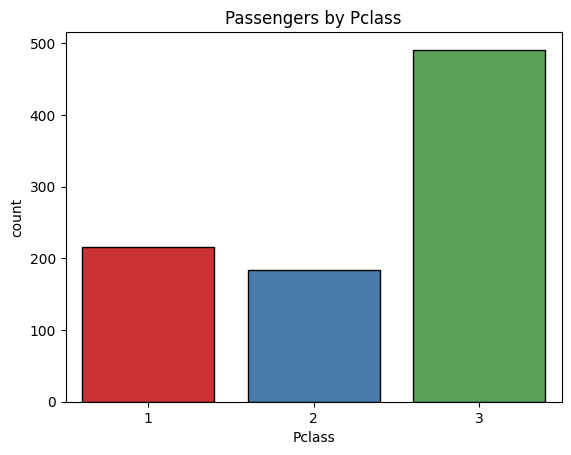

In [54]:
sns.countplot(x='Pclass', data=train_df, 
              palette='Set1',
             edgecolor='black')
plt.title('Passengers by Pclass')
plt.show()

De este gráfico podemos observar que la mayoría de los pasajeros iban en 3ra. clase.

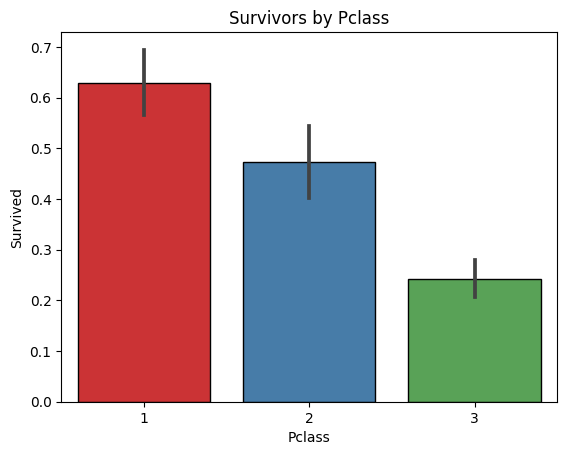

In [55]:
sns.barplot(x='Pclass', 
            y='Survived',
            data=train_df,
              palette= 'Set1',
             edgecolor='black')
plt.title('Survivors by Pclass')
plt.show()

En el gráfico superior observamos que de todas las clases, los pasajeros que iban en 1ra. son los que más sobrevivieron.

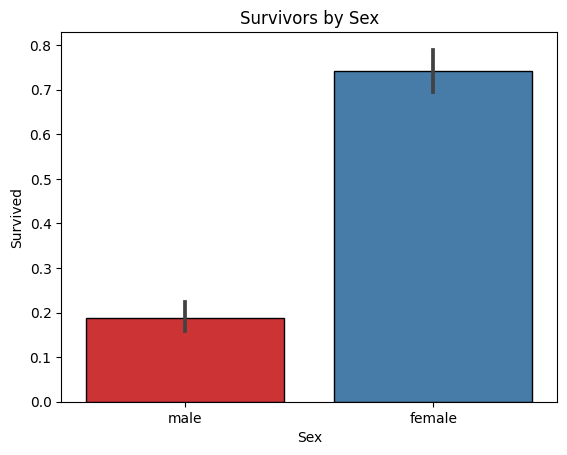

In [56]:
sns.barplot(x='Sex', 
            y='Survived',
            data=train_df,
              palette= 'Set1',
             edgecolor='black')
plt.title('Survivors by Sex')
plt.show()

Aquí sacamos en conclusión que sobrevivieron más mujeres que hombres.

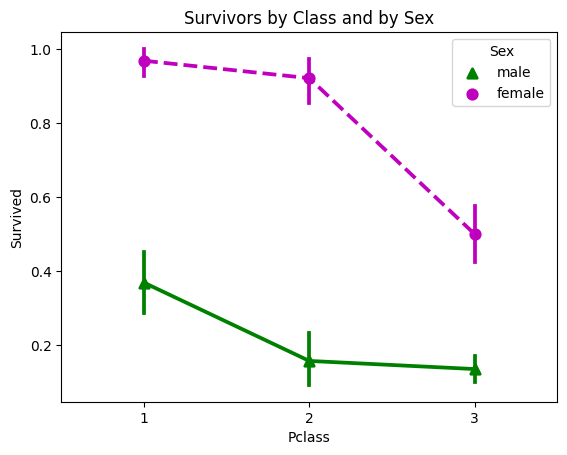

In [57]:
sns.pointplot(x='Pclass',
             y='Survived',
              data=train_df,
             hue='Sex',
             palette={'male':'g',
                     'female':'m'},
             markers=["^", "o"],
             linestyles=["-", "--"])
plt.title('Survivors by Class and by Sex')
plt.show()

En este gráfico confirmamos lo mismo que veíamos en los dos anteriores, que de los pasajeros, los que iban en 1ra. clase son los que más sobrevivieron y que sobrevivieron más mujeres que hombres.

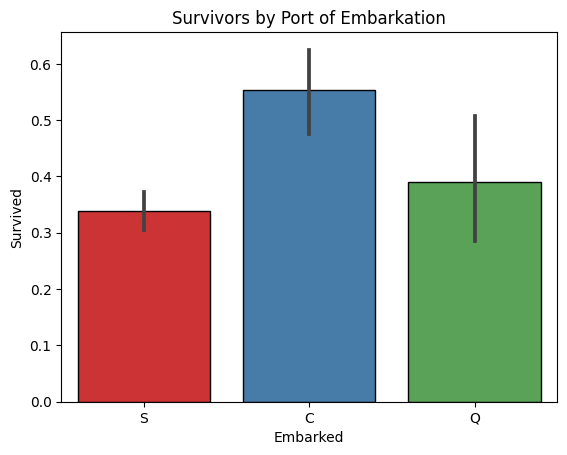

In [58]:
sns.barplot(x='Embarked', 
            y='Survived',
            data=train_df,
              palette='Set1',
             edgecolor='black')
plt.title('Survivors by Port of Embarkation')
plt.show()

De este gráfico observamos que según el pueto de embarcación, parece que sobrevieron más pasajeros procedentes de Cherbourg.

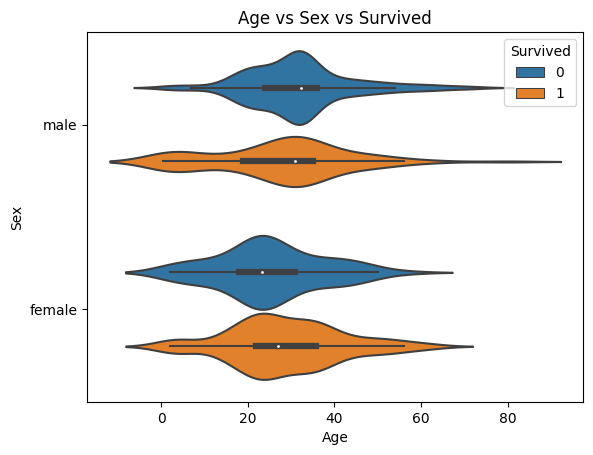

In [59]:
sns.violinplot(x='Age',
           y='Sex',
           data=train_df,
            hue='Survived')
plt.title('Age vs Sex vs Survived')
plt.show()

De este gráfico podemos observar que la mayoría de los pasajeros estaba entre los 20 y los 40 años, tanto hombres como mujeres. También podemos apreciar que sobrevivieron más niños y niñas que personas mayores de 60.

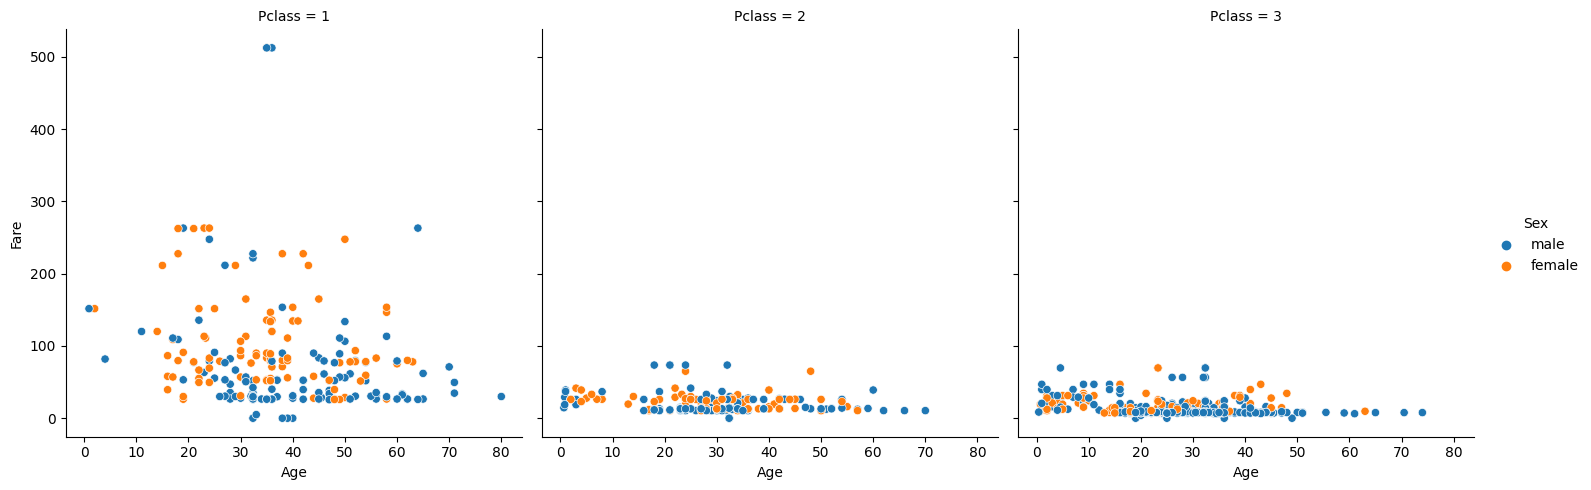

In [60]:
sns.relplot(x='Age', 
            y='Fare',
           data=train_df,
           col='Pclass',
           hue='Sex')
plt.show()

Por último, en este gráfico encontramos que los tickets de segunda y tercera clase tienen un precio similar, mientras que los de primera clase son más caros. Además, en los tickets de primera clase parece que el precio es superior para las mujeres que para los hombres. 

# **Feature Engineering**

Ahora vamos a transformar las variables 'Sex' y 'Embarked' en las variables categóricas 'Categ_Sex' y 'Categ_Embarked', respectivamente. Utilizaremos 1 para hombre y 0 para mujer, así como 0 para 'S', 1 para 'C' y 2 para 'Q'. También, vamos a crear una nueva variable llamada 'Family', en la que recogeremos si tienen familia o no (0 para no y 1 para sí) según las variables 'SibSp', 'Parch'.

In [61]:
train_df['Sex'].replace('male', 1, inplace=True)

In [62]:
train_df['Sex'].replace('female', 0, inplace=True)

In [63]:
test_df['Sex'].replace('male', 1, inplace=True)

In [64]:
test_df['Sex'].replace('female', 0, inplace=True)

In [65]:
train_df['Embarked']=train_df['Embarked'].replace({'S':0, 'C':1, 'Q': 2})

In [66]:
test_df['Embarked']=test_df['Embarked'].replace({'S':0, 'C':1, 'Q': 2})

In [67]:
train_df['Size_family']=train_df['SibSp'] + train_df['Parch']

In [68]:
train_df['Family']=train_df['Size_family'].apply(lambda val:1 if val>=1 else 0)

In [69]:
test_df['Size_family']=test_df['SibSp'] + test_df['Parch']

In [70]:
test_df['Family']=test_df['Size_family'].apply(lambda val:1 if val>=1 else 0)

Finalmente, vamos a eliminar las columnas que no son útiles para el algoritmo ('PassengerId', 'Name', 'SibSp', 'Parch', 'Size_family', 'Ticket' y 'Title')

In [71]:
train_data=train_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Size_family', 'Ticket', 'Title'], axis=1)

In [72]:
test_data=test_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Size_family','Ticket', 'Title'], axis=1)

In [73]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.0,7.2500,0,1
1,1,1,0,38.0,71.2833,1,1
2,1,3,0,26.0,7.9250,0,0
3,1,1,0,35.0,53.1000,0,1
4,0,3,1,35.0,8.0500,0,0


In [74]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,1,34.5,7.8292,2,0
1,3,0,47.0,7.0000,0,1
2,2,1,62.0,9.6875,2,0
3,3,1,27.0,8.6625,0,0
4,3,0,22.0,12.2875,0,1


In [75]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


# **Standardizing Data**

In [76]:
def normalize(df):
    result=df.copy()
    for feature in df.columns:
        max_value=df[feature].max()
        min_value=df[feature].min()
        result[feature] =(df[feature] - min_value)/(max_value - min_value)
    return result

train_data=normalize(train_data)
test_data=normalize(test_data)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0.0,1.0,1.0,0.271174,0.014151,0.0,1.0
1,1.0,0.0,0.0,0.472229,0.139136,0.5,1.0
2,1.0,1.0,0.0,0.321438,0.015469,0.0,0.0
3,1.0,0.0,0.0,0.434531,0.103644,0.0,1.0
4,0.0,1.0,1.0,0.434531,0.015713,0.0,0.0


# **Correlation Analysis**

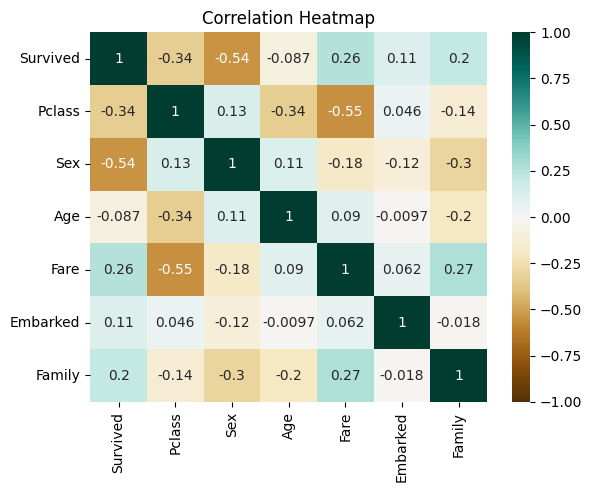

In [77]:
sns.heatmap(train_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()

# **Random Forest Classification**

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [79]:
train_data=train_data.sample(frac=1).reset_index(drop=True)

In [80]:
train, val = train_test_split(train_data, test_size=0.2, random_state=1)

In [81]:
X_train=train.drop('Survived', axis=1)
y_train= train['Survived']
X_val= val.drop('Survived', axis=1)
y_val = val['Survived']

In [82]:
model=RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred=model.predict(X_val)

**Evaluation the model**

In [83]:
accuracy_score(y_val, y_pred)

0.8268156424581006

In [84]:
print(confusion_matrix(y_val, y_pred))

[[90 14]
 [17 58]]


In [85]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       104
         1.0       0.81      0.77      0.79        75

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



**Getting the Test Set Predictions**

In [86]:
test_pred=model.predict(test_data)

In [87]:
test_pred.shape

(418,)

In [88]:
test_pred=test_pred.astype(int)

In [89]:
output= pd.DataFrame({'PassengerId':test_df.PassengerId, 'Survived': test_pred})
output.to_csv('submission2.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!
